# Credit card transaction fraud classification

The `card_transdata_1.csv` dataset contains features that can be used to determine if a credit card transaction is genuine or fraud.  In particular, the dataset includes the following columns:
- `distance_from_home`: the distance from home where the transaction happened.
- `distance_from_last_transaction`: the distance from last transaction happened.
- `ratio_to_median_purchase_price`: ratio of purchased price transaction to median purchase price.
- `repeat_retailer`: is the transaction happened from same retailer.
- `used_chip`: is the transaction through chip (credit card).
- `used_pin_number`: is the transaction happened by using PIN number.
- `online_order`: is the transaction an online order.
- `fraud`: is the transaction fraudulent.

I will construct a mathematical model using logistic regression to determine if a transaction is fraud or genuine.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

print("packages imported")

packages imported


In [14]:
#fraud  data 
fraud_data = pd.read_csv('card_transdata_1.csv')

fraud = pd.DataFrame(fraud_data)
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  int64  
 4   used_chip                       10000 non-null  int64  
 5   used_pin_number                 10000 non-null  int64  
 6   online_order                    10000 non-null  int64  
 7   fraud                           10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [15]:
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [16]:
fraud["fraud"].value_counts()

0    9159
1     841
Name: fraud, dtype: int64

0 = non-fraud
1 = fraud

**Task:** Write a problem statement.

Determine whether or not a credit card transaction is fraud based on distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, and online_order. 

**Task:** State parameters and variables.

**Variables and Parameters:**
| Description | Symbol | Units | Type|
|-------------|--------|-------|-------|
| fraud | $Y$ |  | target (dependent) variable |
| distance_from_home| $X1$ || feature (independent) variable |
|distance_from_last_transaction | $X2$ | | feature (independent) variable |
|ratio_to_median_purchase_price | $X3$ || feature (independent) variable |
|repeat_retailer| $X4$ || feature (independent) variable |
|used_chip| $X5$| | | |
|used_pin_number	| $X6$| | | |
|online_order| $X7$| | | |
| Regularization parameter| $\alpha$| - | parameter |
| Weights | $\bf{W}$ | - | parameter |
| Bias | $b$ | - | parameter |

#### Assumptions and constraints. 

- other than the features listed in variables and parameters, there are no other factors that influence whether or not a transaction is fraud
- the measuring device to measure each feature and target is sufficiently accurate
- we will assume we can split the data in to a training set and a testing set with a 70-30 split
    - assume the model score is representative of when we deploy the model
- each features is independent and each observation independent
- the data is appropriate for logistic regression

Define the data matrix `X` and target vector `y`.

In [17]:
X=fraud[["distance_from_home","distance_from_last_transaction",
       "ratio_to_median_purchase_price",	"repeat_retailer",	"used_chip",	"used_pin_number"	,"online_order"]]

y = fraud["fraud"]

Determine the appropriate amount of regularization to include and then construct a logistic regression model using `LogisticRegression`.  Print out the weights and the bias values determined from your logistic regression.

In [18]:
def costCE(W,b,X,y):
    N,p = X.shape
    W = np.array(W).reshape(p,1)
    y = np.array(y).reshape(N,1)
    S = 1/(1 + np.exp(-(X@W + b)))
    L = -1/N*np.sum(y*np.log(S) + (1 - y)*np.log(1 - S))
    return L

/opt/conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


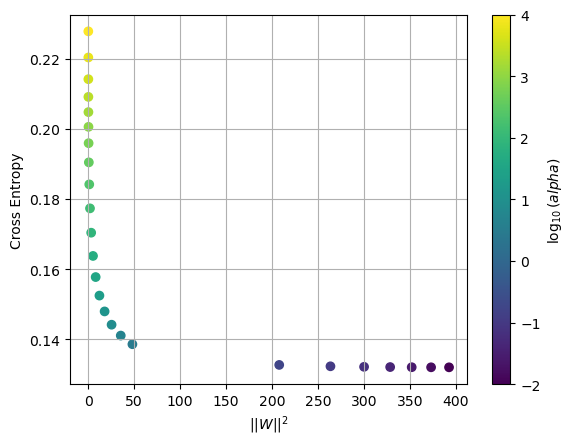

In [20]:
CEs = []
Rs = []
alphas = np.logspace(-2,4,30)
for alpha in alphas:
    model = LogisticRegression(C=1/alpha,max_iter=1000).fit(X,y)
    W = model.coef_
    b = model.intercept_
    CE = costCE(W,b,X,y)
    R = np.linalg.norm(W)**2
    CEs.append(CE)
    Rs.append(R)

plt.scatter(Rs,CEs,c=np.log10(alphas))
plt.grid(True), plt.colorbar(label='$\log_{10}(alpha)$')
plt.xlabel('$|| W ||^2$')
plt.ylabel('Cross Entropy')
plt.show()



Choose $\alpha = -1$

In [21]:
model = LogisticRegression(C=1/10e-1,max_iter=1000).fit(X,y)

W = model.coef_
b = model.intercept_[0]
print('W =',W,', b =',b)

W = [[ 0.01554413  0.01830325  0.73869319 -0.63876191 -1.16875605 -5.73881942
   7.23691113]] , b = -10.583800904237497


Split the data into a training set and a testing set and valuate the model.

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

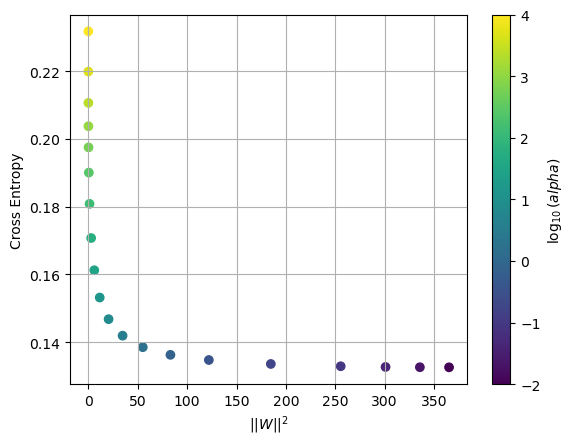

In [23]:
CEs = []
Rs = []
alphas = np.logspace(-2,4,20)
for alpha in alphas:
    model = LogisticRegression(C=1/alpha,max_iter = 1000).fit(X_train,y_train)
    W = model.coef_
    b = model.intercept_
    CE = costCE(W,b,X_train,y_train)
    R = np.linalg.norm(W)**2
    CEs.append(CE)
    Rs.append(R)

plt.scatter(Rs,CEs,c=np.log10(alphas))
plt.grid(True), plt.colorbar(label='$\log_{10}(alpha)$')
plt.xlabel('$|| W ||^2$')
plt.ylabel('Cross Entropy')
plt.show()



once again, choose $\alpha = -1$

In [24]:
model1 = LogisticRegression(C=1/10e-1,max_iter=1000).fit(X_train,y_train)

W = model1.coef_
b = model1.intercept_[0]
print('W =',W,', b =',b)

W = [[ 0.01519479  0.01522666  0.69695212 -0.5519553  -1.04037345 -5.36102806
   6.49878104]] , b = -9.829486342754194


In [25]:
model1.score(X_test, y_test)

0.9493333333333334

In [26]:
C = confusion_matrix(y_test,model1.predict(X_test))
C

array([[2714,   23],
       [ 129,  134]])

In [27]:
# % correctly identifying fraud transactions
C[1,1]/(C[1,0] + C[1,1])

0.5095057034220533

Scale the matrix `X` and perform a new logistic regression. 

In [28]:
Xs = StandardScaler().fit_transform(X)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(Xs, y, test_size=0.3)

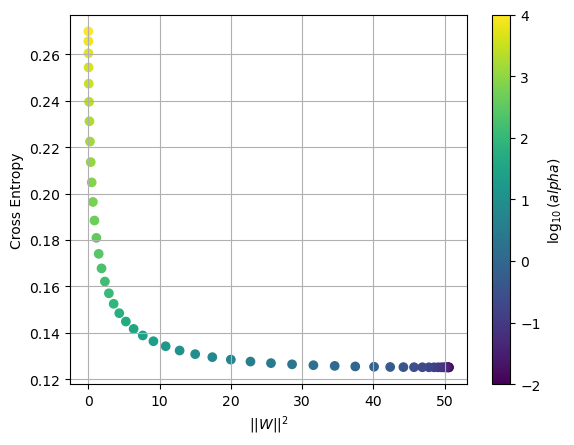

In [29]:
CEs1 = []
Rs1 = []
alphas = np.logspace(-2,4,50)
for alpha in alphas:
    model = LogisticRegression(C=1/alpha,max_iter=10000).fit(X_train_scaled,y_train_scaled)
    W = model.coef_
    b = model.intercept_
    CE = costCE(W,b,X_train_scaled,y_train_scaled)
    R = np.linalg.norm(W)**2
    CEs1.append(CE)
    Rs1.append(R)

plt.scatter(Rs1,CEs1,c=np.log10(alphas))
plt.grid(True)
plt.colorbar(label='$\log_{10}(alpha)$')
plt.xlabel('$|| W ||^2$')
plt.ylabel('Cross Entropy')
plt.show()

Regularization parameter still choose $\alpha = -1$

In [30]:
model2 = LogisticRegression(C=1/10e-3,max_iter=1000).fit(X_train_scaled,y_train_scaled)

W = model2.coef_
b = model2.intercept_[0]
print('W =',W,', b =',b)

W = [[ 1.08642019  0.29354443  2.40975518 -0.23412098 -0.67968161 -4.29872648
   4.95231478]] , b = -7.825825011217924


In [31]:
model2.score(X_test_scaled, y_test_scaled)

0.9553333333333334

In [32]:
C1 = confusion_matrix(y_test_scaled,model2.predict(X_test_scaled))
C1

array([[2721,   16],
       [ 118,  145]])

In [33]:
# % correctly identifying fraud transactions
C1[1,1]/(C1[1,0] + C1[1,1])

0.5513307984790875

**Task:** Pick a model: the model without scaled data or the model with scaled data (be sure to justify your choice!). 

Using your chosen model, print out the $W$ and $b$ values.  From your values, determine the $2$ features which have the largest $W$ (in absolute magnitude).  Refit the model with these features and determine the accuracy.  

Compare this model with the previous models.  Is there improvement?  In particular, produce the confusion matrices and discuss the false positives/negatives in the context of the modelling task.

In [34]:
print(C)
print(C1)

[[2714   23]
 [ 129  134]]
[[2721   16]
 [ 118  145]]


I'll pick the scaled model. It is more harmful to for the model to predict non-fraud when a transaction is actually fraud. Since in the first confusion matrix, the model is predicting more non-fraud when it's actually fraud, the scaled model is better. However, the models are about the same

In [35]:
W = model2.coef_
b = model2.intercept_[0]
print('W =',W,', b =',b)

W = [[ 1.08642019  0.29354443  2.40975518 -0.23412098 -0.67968161 -4.29872648
   4.95231478]] , b = -7.825825011217924


The 2 features with the largest weight are online order and used_pin_number.

In [36]:
X1 = fraud[["used_pin_number", "online_order"]]
y1 = fraud["fraud"]

In [37]:
Xs1 = StandardScaler().fit_transform(X)

X1_train_scaled, X1_test_scaled, y1_train_scaled, y1_test_scaled = train_test_split(X1, y1, test_size=0.3)

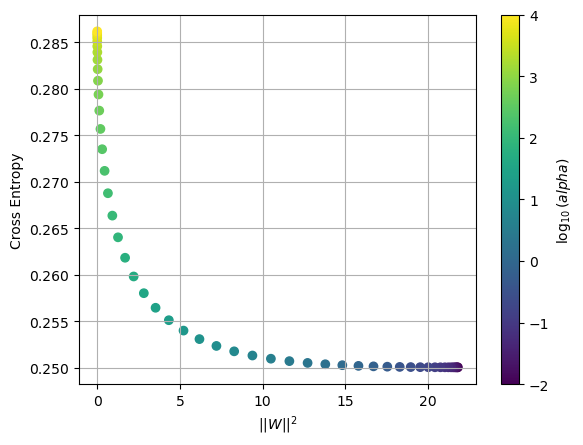

In [39]:
CEs1 = []
Rs1 = []
alphas = np.logspace(-2,4,50)
for alpha in alphas:
    model = LogisticRegression(C=1/alpha,max_iter=1000).fit(X1_train_scaled,y1_train_scaled)
    W = model.coef_
    b = model.intercept_
    CE = costCE(W,b,X1_train_scaled,y1_train_scaled)
    R = np.linalg.norm(W)**2
    CEs1.append(CE)
    Rs1.append(R)

plt.scatter(Rs1,CEs1,c=np.log10(alphas))
plt.grid(True)
plt.colorbar(label='$\log_{10}(alpha)$')
plt.xlabel('$|| W ||^2$')
plt.ylabel('Cross Entropy')
plt.show()

It looks like $\alpha = -1$ is the best

In [40]:
model3 = LogisticRegression(C=1/10e-1,max_iter=1000).fit(X1_train_scaled,y1_train_scaled)

W = model3.coef_
b = model3.intercept_[0]
print('W =',W,', b =',b)

W = [[-2.76215584  2.80129217]] , b = -4.632328334214859


In [41]:
model3.score(X1_test_scaled, y1_test_scaled)

0.914

In [42]:
C2 = confusion_matrix(y1_test_scaled,model3.predict(X1_test_scaled))
C2

array([[2742,    0],
       [ 258,    0]])

In [43]:
# % correctly identifying fraud transactions
C2[1,1]/(C2[1,0] + C2[1,1])

0.0

**Task:** Once you have determine the $2$ features from the previous task, visualize the model and showcase how the model behaves with varying input.  Be creative here! 

In [44]:
# x0 = np.linspace(-2,2,50) ## Here we are using a wider range than the plot above
# x1 = np.linspace(-2,2,50)  ## for each linspace

# X0,X1 = np.meshgrid(x0,x1)

# W0 = model3.coef_[0,0]
# W1 = model3.coef_[0,1] 
# b = model.intercept_[0]

# Y = 1/(1 + np.exp(-(W0*X0 + W1*X1 + b)))

# plt.contourf(X0,X1,Y,levels=10,alpha=0.2)
# plt.contour(X0,X1,Y,levels=[0.5],colors='r')
# plt.scatter(X[:,5],X[:,6],c=y,alpha=0.2,lw=0)
# plt.grid(True), plt.colorbar()
# plt.show()

Analysis : 
The scaled data and un-scaled data model seems to produce around the same results. We have a high accuracy because most of the data is composed of non-fraud transaction. Therefore, even having a dummyclassifer model to default preduct non-fraud would have a high accuracy because we have unbalanced data. The confusion matrix, however, breaks down how the model is performing and it is about 65% accurate at predicting true fraud transactions whether the data for scaled data and 58% for unscaled data. When we take only the 2 features with the most weight, we get a really bad model, that doesn't predict true fraud transactions.

#### Part 2 - Reflection 
This reflection should have two parts: 

1) Explain in a list of bullet points the changes you have made to your model in the version you are submitting and why you chose to make those changes. 

2) In a paragraph or two reflect on the following prompts:
    - What part of the six modelling steps was the most challenging for you?
    - What helped you to identify any mistakes/misconceptions in your original model?
    - Do you think these techniques would be helpful for identifying mistakes/misconceptions in future assignments? Why or why not? 

Question 1
- line 31 had wrong x_test and y_test variable for calculating model.score(x,y) : changed to X1_test_scaled and y1_test_scaled
- change all alpha to -1 as it's the best value. made alpha = np.logspace(-2,4,n) instead of np.logspace(-4,4,n)
- change comment for all confusion matrix cells to % correctly identifying fraud transactions instead of non-fraud transactions
- update analysis
- added value counts of fraud transaction to see number of fraud = 0 and fraud = 1d = 1

Question 2
- analysis was harder for this because there was really odd results from the model, especially the model with the 2 strongest features
- going over the assignment and re-running each cell after restarting the kernel helped me identify mistakes. I realized there were some cells that didn't even run. Taking time to look at the graph helped me choose a better alpha value.
- yes restarting kernel and re-running each cell would help me identify mistakes in the future. Sometimes old values are stored and I use them by accident so I should be more careful with which variable I'm using for predicting